<a href="https://colab.research.google.com/github/NguyenTienThuann/AI_ST7/blob/main/BOOK_FINDER_MODEL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

data = '/content/drive/MyDrive/5BOOKS/'

photos,labels = list(), list()
for file in listdir(data):
  output=0.0
  if file.startswith('NGK'):
    output = 1
  if file.startswith('BTD'):
    output = 2
  if file.startswith('CGD'):
    output = 3
  if file.startswith('NTK'):
    output = 4
  if file.startswith('TDB'):
    output = 5
  if file.startswith('KXD'):
    output = 6
  # ALL Picture is resized
  img = load_img(data + file,target_size=(50,90))
  # Change image to array
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)

save('/content/drive/MyDrive/Colab Notebooks/5BOOKS_photos.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/5BOOKS_labels.npy',labels)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

url  = '/content/drive/MyDrive/Colab Notebooks/5BOOKS_labels.npy'
url2 = '/content/drive/MyDrive/Colab Notebooks/5BOOKS_photos.npy'

# Load data and check image size
photos = np.load(url2)
print("size of photos:  ",photos.shape)
labels = np.load(url)
print("size of label : ",labels.shape)

# Convert integer to binary matrix
labels = to_categorical(labels,7)
# divide to 2 test and train gr
p_train,p_test,l_train,l_test = train_test_split(photos,labels, test_size = 0.1)

# Scale pixel value to between (0&1)
p_train = p_train.astype('float32')/255
p_test  = p_test.astype('float32')/255





size of photos:   (1644, 50, 90, 3)
size of label :  (1644,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, LeakyReLU, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (50,90,3), padding = 'same' ))
model.add(LeakyReLU(alpha =0.1))
model.add(MaxPooling2D((2,2), padding ="same" ))

model.add(Conv2D(64,(3,3), activation = 'relu', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Dense(7,activation = 'softmax'))
model.compile(loss = categorical_crossentropy , optimizer = Adam(), metrics = ['accuracy'])
model.summary()
train = model.fit(p_train,l_train, batch_size = 64, epochs = 100)
acc = model.evaluate(p_test,l_test)
print("Do chinh xac:  ",acc)









Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 90, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 90, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 45, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 25, 45, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 23, 64)       0         
 2D)                                                  

In [ ]:
model.save('5BOOKS2.h5')

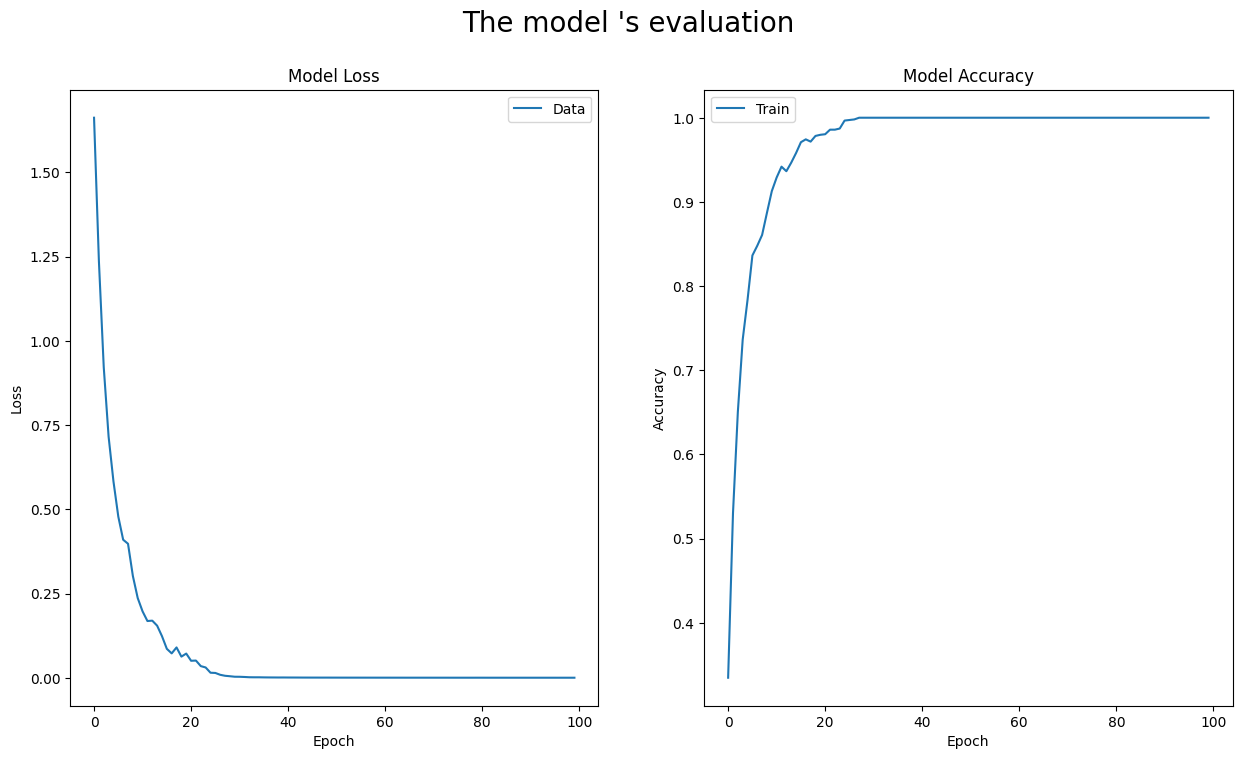

In [ ]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])

plt.show()